## Preparation

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import pickle
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.3
numpy 1.18.4
pandas 1.2.0
sklearn 0.24.0
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


### Read data

In [3]:
cifar10_dir = os.getcwd() + '/datasets/cifar-10-batches-py/'
train_name = 'data_batch_'
test_name = 'test_batch'
train_X = None
train_Y = None
test_X = None
test_Y = None

for i in range(1, 6):
    file_path = cifar10_dir + train_name + str(i)
    with open(file_path, 'rb') as fo:
        dictionary = pickle.load(fo, encoding='bytes')
        if train_X is None:
            train_X = dictionary[b'data']
            train_Y = dictionary[b'labels']
        else:
            train_X = np.concatenate((train_X, dictionary[b'data']), axis=0)
            train_Y = np.concatenate((train_Y, dictionary[b'labels']), axis=0)

file_path = cifar10_dir + test_name
with open(file_path, 'rb') as fo:
    dictionary = pickle.load(fo, encoding='bytes')
    test_X = dictionary[b'data']
    test_Y = np.array(dictionary[b'labels'])

train_X = train_X.reshape((50000, 3, 32, 32)).transpose(0, 2, 3, 1).astype(np.float)
test_X = test_X.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1).astype(np.float)

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [4]:
# One-hot encoding
train_y_vec = np.zeros((len(train_Y), 10), dtype=np.float)
test_y_vec = np.zeros((len(test_Y), 10), dtype=np.float)
for i, label in enumerate(train_Y):
    train_y_vec[i, int(train_Y[i])] = 1.
for i, label in enumerate(test_Y):
    test_y_vec[i, int(test_Y[i])] = 1.

# Normalization
train_X = train_X/255.
test_X = test_X/255.

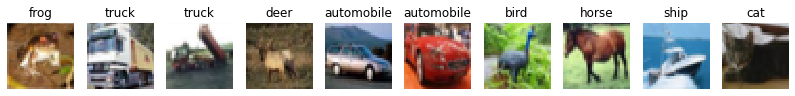

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.title(class_names[y_data[index]])
            plt.axis("off")
    plt.show()

show_imgs(1, 10, train_X, train_Y, class_names)

In [10]:
Xtrain, Xvalid = train_X[:40000], train_X[40000:]
Ytrain_vec, Yvalid_vec = train_y_vec[:40000], train_y_vec[40000:]

In [9]:
height = 32
width = 32
channels = 3
batch_size = 32
num_classes = 10

## Modeling

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                        activation="selu", input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=512, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.Conv2D(filters=512, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="selu"),
    keras.layers.Dense(num_classes, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 512)         1

## Training

In [13]:
print("steps per epoch: ", Xtrain.shape[0] // batch_size)

steps per epoch:  1250


In [14]:
epochs = 20  # raise this!
# fit fit_generator?
history = model.fit(Xtrain, 
                    steps_per_epoch = Xtrain.shape[0] // batch_size,
                    epochs = epochs,
                    validation_data = Xvalid,
                    validation_steps = Xvalid.shape[0] // batch_size)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
IMAGE_SIZE = 32
SAVE_MODEL_PATH = './pre_train_model/model_alexnet'
Train = True
Hashbits = 48

def create_alexnet(classes, hashbits):
    network = input_data(shape=[None, IMAGE_SIZE, IMAGE_SIZE, 3])
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    BinaryHash = fully_connected(network, hashbits, activation='sigmoid')
    network = fully_connected(BinaryHash, classes, activation='softmax')
    network = regression(network, optimizer='momentum', loss='categorical_crossentropy', learning_rate=0.001)
    return network

def HashBinaryOut(hashbits):
    network = input_data(shape=[None, IMAGE_SIZE, IMAGE_SIZE, 3])
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    BinaryHash = fully_connected(network, hashbits, activation='sigmoid')
    return BinaryHash

def toBinaryString(binary_like_values):
    numOfImage, bit_length = binary_like_values.shape
    list_string_binary = []
    for i in range(numOfImage):
        str = ''
        for j in range(bit_length):
            str += '0' if binary_like_values[i][j] <= 0 else '1'
        list_string_binary.append(str)
    return list_string_binary

def search_compute(query, databook, image, data):
    hamming_dis = np.zeros(len(databook))
    dis = np.zeros(50)
    for i in range(len(databook)):
        hamming_dis[i] = np.sum(abs(query - databook[i]))
    ham_index = hamming_dis.argsort()
    for k in range(1, 51):
        dis[k-1] = np.linalg.norm(image - data[int(ham_index[k])])
    index = dis.argsort()

In [ ]:
if __name__ == '__main__':
    if Train:
        network = create_alexnet(10, Hashbits)
        traindata, trainlabel, testdata, testlabel = read_cifar10_data()
        train(network, traindata, trainlabel, SAVE_MODEL_PATH)
    else:
        traindata, trainlabel, testdata, testlabel = read_cifar10_data()
        net = HashBinaryOut(Hashbits)
        model = DNN(net)
        model.load(SAVE_MODEL_PATH)
        #制作数据码本
        file_res = open('result.txt', 'w')
        codebook = model.predict(traindata)
        w_res = toBinaryString(codebook)
        w_label = toBinaryString(np.argmax(trainlabel))
        for j in range(50000):
            file_res.write(w_res[j] + '\t' + str(w_label[j]) + '\n')
        file_res.close()
        #对输入图片进行检索
        query = testdata[0]
        binaryfeature= model.predict(query)
        print(binaryfeature)
        search_compute(binaryfeature, codebook, query, traindata)
